In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import time

### Importing Models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from PARAMS import FULL_DATA_NEW_20_VOL2_PATH, FULL_DATA_NEW_40_VOL2_PATH, FULL_DATA_NEW_60_VOL2_PATH, FULL_DATA_NEW_80_VOL2_PATH, FULL_DATA_NEW_100_VOL2_PATH

In [4]:
dataset_20 = pd.read_csv(FULL_DATA_NEW_20_VOL2_PATH)
dataset_40 = pd.read_csv(FULL_DATA_NEW_40_VOL2_PATH)
dataset_60 = pd.read_csv(FULL_DATA_NEW_60_VOL2_PATH)
dataset_80 = pd.read_csv(FULL_DATA_NEW_80_VOL2_PATH)
dataset_100 = pd.read_csv(FULL_DATA_NEW_100_VOL2_PATH)

In [5]:
dataset_20 = dataset_20.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_40 = dataset_40.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_60 = dataset_60.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_80 = dataset_80.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_100 = dataset_100.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]

### Declaring variables

In [6]:
# Independent
X_20 = dataset_20.drop(dataset_20.columns[19], axis=1)
X_40 = dataset_40.drop(dataset_40.columns[19], axis=1)
X_60 = dataset_60.drop(dataset_60.columns[19], axis=1)
X_80 = dataset_80.drop(dataset_80.columns[19], axis=1)
X_100 = dataset_100.drop(dataset_100.columns[19], axis=1)

# Dependent
y_20 = dataset_20.iloc[:, 19].values
y_40 = dataset_40.iloc[:, 19].values
y_60 = dataset_60.iloc[:, 19].values
y_80 = dataset_80.iloc[:, 19].values
y_100 = dataset_100.iloc[:, 19].values

### Print Heatmaps

#### Download chart with
plt.savefig('10_heatmap_20_1.png', dpi=300, bbox_inches='tight')

<AxesSubplot:>

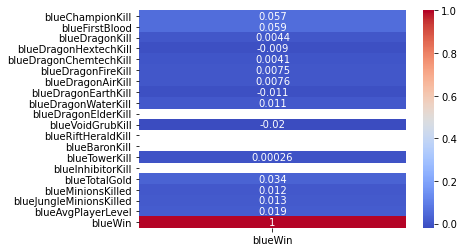

In [7]:
sns.heatmap(dataset_20.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

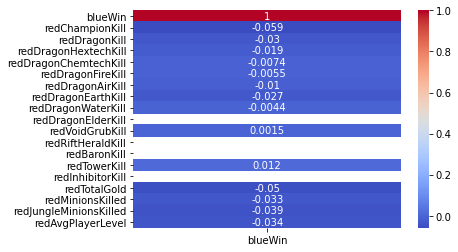

In [8]:
sns.heatmap(dataset_20.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

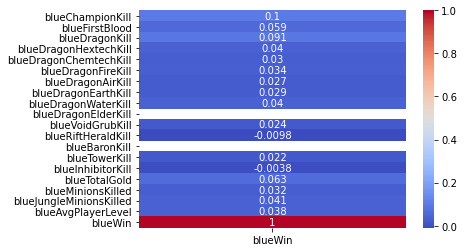

In [9]:
sns.heatmap(dataset_40.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

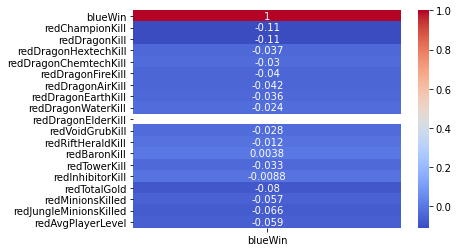

In [10]:
sns.heatmap(dataset_40.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

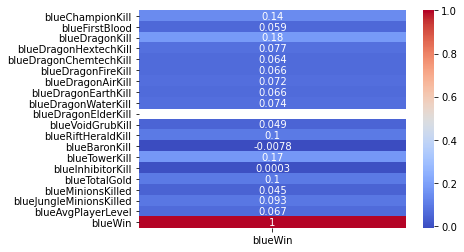

In [11]:
sns.heatmap(dataset_60.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

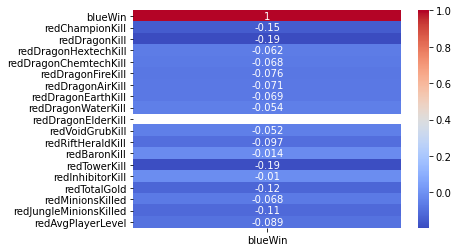

In [12]:
sns.heatmap(dataset_60.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

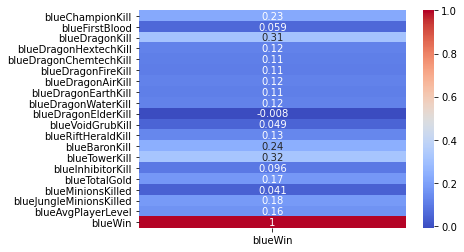

In [13]:
sns.heatmap(dataset_80.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

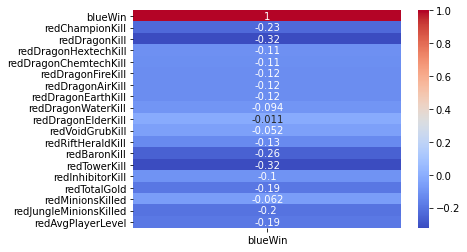

In [14]:
sns.heatmap(dataset_80.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

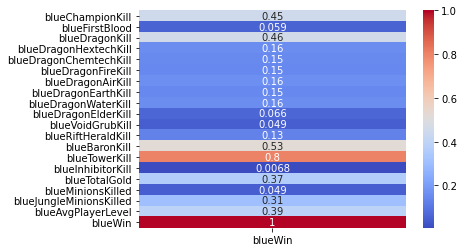

In [15]:
sns.heatmap(dataset_100.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

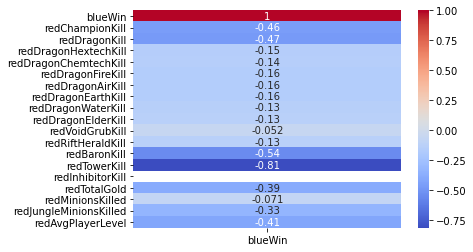

In [16]:
sns.heatmap(dataset_100.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

### Print Correlation Matrix

In [17]:
temporary_list = list()
for i in dataset_20:
    temporary_list.append(i)

In [18]:
correlation_matrix = dataset_20.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.057464933583736014
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.00436709747414518
blueDragonHextechKill: -0.009012476106849117
blueDragonChemtechKill: 0.0040748263316816155
blueDragonFireKill: 0.00745233950726774
blueDragonAirKill: 0.0076257227504205145
blueDragonEarthKill: -0.010895211671726792
blueDragonWaterKill: 0.011092168255118608
blueDragonElderKill: nan
blueVoidGrubKill: -0.019623748875593563
blueRiftHeraldKill: nan
blueBaronKill: nan
blueTowerKill: 0.0002638317787493478
blueInhibitorKill: nan
blueTotalGold: 0.03405986876160807
blueMinionsKilled: 0.011600825537329962
blueJungleMinionsKilled: 0.013242137159755375
blueAvgPlayerLevel: 0.01936565354228294
blueWin: 1.0
redChampionKill: -0.058773177544444916
redDragonKill: -0.03044900626493879
redDragonHextechKill: -0.018940850123626493
redDragonChemtechKill: -0.00738434673131428
redDragonFireKill: -0.005502384999058679
redDragonAirKill: -0.010228836696305588
redDragonEarthKill: -0.02664647495310164
redDr

In [19]:
correlation_matrix = dataset_40.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.0997831428589925
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.0911506416854219
blueDragonHextechKill: 0.039910083896441934
blueDragonChemtechKill: 0.030458317394997162
blueDragonFireKill: 0.03380054644169076
blueDragonAirKill: 0.027313697597696446
blueDragonEarthKill: 0.02939141356783353
blueDragonWaterKill: 0.039529271686019975
blueDragonElderKill: nan
blueVoidGrubKill: 0.0243730002458318
blueRiftHeraldKill: -0.009772542814937231
blueBaronKill: nan
blueTowerKill: 0.02171578507386744
blueInhibitorKill: -0.0037715405566576005
blueTotalGold: 0.06266508883046036
blueMinionsKilled: 0.03233918489088763
blueJungleMinionsKilled: 0.04125483770458336
blueAvgPlayerLevel: 0.03810063258128001
blueWin: 1.0
redChampionKill: -0.10927438270333263
redDragonKill: -0.10610590803886323
redDragonHextechKill: -0.03684473923619956
redDragonChemtechKill: -0.030425269422180885
redDragonFireKill: -0.04007628764469593
redDragonAirKill: -0.04235173113087173
redDragonEarthKill: -0.0357

In [20]:
correlation_matrix = dataset_60.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.14240170735176497
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.1828106430591464
blueDragonHextechKill: 0.07667697821930983
blueDragonChemtechKill: 0.0639512978722182
blueDragonFireKill: 0.0663125519850956
blueDragonAirKill: 0.07158080913733414
blueDragonEarthKill: 0.06648029560427013
blueDragonWaterKill: 0.0740033911281141
blueDragonElderKill: nan
blueVoidGrubKill: 0.049443303402783766
blueRiftHeraldKill: 0.10179390109422998
blueBaronKill: -0.007835459426310339
blueTowerKill: 0.17389867711137214
blueInhibitorKill: 0.00029815288327099496
blueTotalGold: 0.10131220193156858
blueMinionsKilled: 0.04497645197867887
blueJungleMinionsKilled: 0.09279784071505161
blueAvgPlayerLevel: 0.06692322890858107
blueWin: 1.0
redChampionKill: -0.15184951653889722
redDragonKill: -0.1942214611596117
redDragonHextechKill: -0.061811821692941187
redDragonChemtechKill: -0.06785503137088464
redDragonFireKill: -0.07628893406461765
redDragonAirKill: -0.07149302195287738
redDragonEarthKi

In [21]:
correlation_matrix = dataset_80.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.22644838078629007
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.3126883113686549
blueDragonHextechKill: 0.12185499408826411
blueDragonChemtechKill: 0.11151291350663634
blueDragonFireKill: 0.10792086707634378
blueDragonAirKill: 0.12138544295099021
blueDragonEarthKill: 0.111210259033615
blueDragonWaterKill: 0.1190310005023049
blueDragonElderKill: -0.008026644652403598
blueVoidGrubKill: 0.049443303402783766
blueRiftHeraldKill: 0.13184132213738217
blueBaronKill: 0.2419073842380062
blueTowerKill: 0.31957085602076846
blueInhibitorKill: 0.09621806928306381
blueTotalGold: 0.17315185542558267
blueMinionsKilled: 0.0411174663428479
blueJungleMinionsKilled: 0.1826768212576313
blueAvgPlayerLevel: 0.16426434416752003
blueWin: 1.0
redChampionKill: -0.23132931229616263
redDragonKill: -0.32322845623557256
redDragonHextechKill: -0.10871826698660828
redDragonChemtechKill: -0.11171435355161494
redDragonFireKill: -0.11912438788405992
redDragonAirKill: -0.12144266941701809
redDra

In [22]:
correlation_matrix = dataset_100.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.45129067399234024
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.45698442348156143
blueDragonHextechKill: 0.15838235120528338
blueDragonChemtechKill: 0.15067784890261213
blueDragonFireKill: 0.14895711766992506
blueDragonAirKill: 0.16210346971454231
blueDragonEarthKill: 0.15003442272183096
blueDragonWaterKill: 0.15850913064826747
blueDragonElderKill: 0.06636805625490597
blueVoidGrubKill: 0.049443303402783766
blueRiftHeraldKill: 0.13184132213738217
blueBaronKill: 0.5261334388366916
blueTowerKill: 0.8046904781287519
blueInhibitorKill: 0.006775080037577916
blueTotalGold: 0.3668817674099261
blueMinionsKilled: 0.048755065194398435
blueJungleMinionsKilled: 0.3060848403228481
blueAvgPlayerLevel: 0.39095858454339655
blueWin: 1.0
redChampionKill: -0.4569426618654467
redDragonKill: -0.467899291115953
redDragonHextechKill: -0.14901314362541868
redDragonChemtechKill: -0.13984882727341455
redDragonFireKill: -0.1591268193393816
redDragonAirKill: -0.15948757255998922
redDrag

### Logistic Regression

In [23]:
# Defining Pipeline
logisticRegression = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [24]:
# Perform Cross-Validation

start_logistic_regression = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_logistic_regression = cross_val_score(logisticRegression, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_logistic_regression = cross_val_score(logisticRegression, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_logistic_regression = cross_val_score(logisticRegression, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_logistic_regression = cross_val_score(logisticRegression, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_logistic_regression = cross_val_score(logisticRegression, X_100, y_100, cv=cv, scoring='accuracy')

end_logistic_regression = time.time()

logistic_regression_time = end_logistic_regression - start_logistic_regression

In [25]:
print(scores_20_logistic_regression)
print(scores_40_logistic_regression)
print(scores_60_logistic_regression)
print(scores_80_logistic_regression)
print(scores_100_logistic_regression)

[0.55431533 0.56268686 0.57336523 0.57236842 0.56200159]
[0.60833167 0.61789914 0.6265949  0.62460128 0.61523126]
[0.6693243  0.68626669 0.67922648 0.67882775 0.67204944]
[0.79130955 0.7909109  0.78169856 0.78708134 0.78110048]
[0.98584812 0.98724337 0.98464912 0.98644338 0.98225678]


In [26]:
print("Acurracy dataset_20: ", end="")
print(scores_20_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_logistic_regression.mean() * 100, end="%\n")

Acurracy dataset_20: 56.494748795085535%
Acurracy dataset_40: 61.8531649489026%
Acurracy dataset_60: 67.71389317786827%
Acurracy dataset_80: 78.64201666487054%
Acurracy dataset_100: 98.52881542468526%


In [27]:
logistic_regression_accuracy = list()
logistic_regression_accuracy.append(scores_20_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_40_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_60_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_80_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_100_logistic_regression.mean() * 100)

### Decision Tree

In [28]:
# Defining Pipeline
decisionTree = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

In [29]:
# Perform Cross-Validation

start_decision_tree = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_decision_tree = cross_val_score(decisionTree, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_decision_tree = cross_val_score(decisionTree, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_decision_tree = cross_val_score(decisionTree, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_decision_tree = cross_val_score(decisionTree, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_decision_tree = cross_val_score(decisionTree, X_100, y_100, cv=cv, scoring='accuracy')

end_decision_tree = time.time()

decision_tree_time = end_decision_tree - start_decision_tree

In [30]:
print(scores_20_decision_tree)
print(scores_40_decision_tree)
print(scores_60_decision_tree)
print(scores_80_decision_tree)
print(scores_100_decision_tree)

[0.51405222 0.51624477 0.52173046 0.50777512 0.50697767]
[0.54893363 0.54534582 0.54784689 0.55223285 0.54047049]
[0.5826191  0.58122384 0.5819378  0.58552632 0.58452951]
[0.71118198 0.71038469 0.70035885 0.70035885 0.70594099]
[0.96133147 0.96571656 0.95494418 0.95992823 0.95833333]


In [31]:
print("Acurracy dataset_20: ", end="")
print(scores_20_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_decision_tree.mean() * 100, end="%\n")

Acurracy dataset_20: 51.33560487643448%
Acurracy dataset_40: 54.6965937820978%
Acurracy dataset_60: 58.316731088779804%
Acurracy dataset_80: 70.56450730991503%
Acurracy dataset_100: 96.00507556604197%


In [32]:
decision_tree_accuracy = list()
decision_tree_accuracy.append(scores_20_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_40_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_60_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_80_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_100_decision_tree.mean() * 100)

### Random Forest

In [33]:
# Defining Pipeline
randomForest = Pipeline([
    ('classifier', RandomForestClassifier())
])

In [34]:
# Perform Cross-Validation

start_random_forest = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_random_forest = cross_val_score(randomForest, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_random_forest = cross_val_score(randomForest, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_random_forest = cross_val_score(randomForest, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_random_forest = cross_val_score(randomForest, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_random_forest = cross_val_score(randomForest, X_100, y_100, cv=cv, scoring='accuracy')

end_random_forest = time.time()

random_forest_time = end_random_forest - start_random_forest

In [35]:
print(scores_20_random_forest)
print(scores_40_random_forest)
print(scores_60_random_forest)
print(scores_80_random_forest)
print(scores_100_random_forest)

[0.53518039 0.5451465  0.54605263 0.55243222 0.55362839]
[0.59417979 0.6005581  0.61323764 0.59669059 0.59908293]
[0.66175005 0.67749651 0.66985646 0.66527113 0.66885965]
[0.78054614 0.78293801 0.78129984 0.77870813 0.78050239]
[0.975882   0.97986845 0.97807018 0.97727273 0.97667464]


In [36]:
print("Acurracy dataset_20: ", end="")
print(scores_20_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_random_forest.mean() * 100, end="%\n")

Acurracy dataset_20: 54.64880252436771%
Acurracy dataset_40: 60.07498110888688%
Acurracy dataset_60: 66.86467605039199%
Acurracy dataset_80: 78.07989041405949%
Acurracy dataset_100: 97.75535984669668%


In [37]:
random_forest_accuracy = list()
random_forest_accuracy.append(scores_20_random_forest.mean() * 100)
random_forest_accuracy.append(scores_40_random_forest.mean() * 100)
random_forest_accuracy.append(scores_60_random_forest.mean() * 100)
random_forest_accuracy.append(scores_80_random_forest.mean() * 100)
random_forest_accuracy.append(scores_100_random_forest.mean() * 100)

### KNN

In [38]:
# Defining Pipeline
KNN = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [39]:
# Perform Cross-Validation

start_knn = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_knn = cross_val_score(KNN, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_knn = cross_val_score(KNN, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_knn = cross_val_score(KNN, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_knn = cross_val_score(KNN, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_knn = cross_val_score(KNN, X_100, y_100, cv=cv, scoring='accuracy')

end_knn = time.time()

knn_time = end_knn - start_knn

In [40]:
print(scores_20_knn)
print(scores_40_knn)
print(scores_60_knn)
print(scores_80_knn)
print(scores_100_knn)

[0.52521427 0.52062986 0.52372408 0.5199362  0.52830941]
[0.55929839 0.56069364 0.56299841 0.54704944 0.5604067 ]
[0.60813235 0.60215268 0.59888357 0.61662679 0.59230463]
[0.71795894 0.71995216 0.71590909 0.72667464 0.7226874 ]
[0.94219653 0.94179789 0.94457735 0.94417863 0.93779904]


In [41]:
print("Acurracy dataset_20: ", end="")
print(scores_20_knn.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_knn.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_knn.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_knn.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_knn.mean() * 100, end="%\n")

Acurracy dataset_20: 52.35627653855678%
Acurracy dataset_40: 55.80893145124758%
Acurracy dataset_60: 60.36200045840951%
Acurracy dataset_80: 72.06364469257475%
Acurracy dataset_100: 94.21098885797858%


In [42]:
knn_accuracy = list()
knn_accuracy.append(scores_20_knn.mean() * 100)
knn_accuracy.append(scores_40_knn.mean() * 100)
knn_accuracy.append(scores_60_knn.mean() * 100)
knn_accuracy.append(scores_80_knn.mean() * 100)
knn_accuracy.append(scores_100_knn.mean() * 100)

### Naive Bayes (GaussianNB)

In [43]:
# Defining Pipeline
naiveBayes = Pipeline([
    ('classifier', GaussianNB())
])

In [44]:
# Perform Cross-Validation

start_naive_bayes = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_naive_bayes = cross_val_score(naiveBayes, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_naive_bayes = cross_val_score(naiveBayes, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_naive_bayes = cross_val_score(naiveBayes, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_naive_bayes = cross_val_score(naiveBayes, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_naive_bayes = cross_val_score(naiveBayes, X_100, y_100, cv=cv, scoring='accuracy')

end_naive_bayes = time.time()

naive_bayes_time = end_naive_bayes - start_naive_bayes

In [45]:
print(scores_20_naive_bayes)
print(scores_40_naive_bayes)
print(scores_60_naive_bayes)
print(scores_80_naive_bayes)
print(scores_100_naive_bayes)

[0.50867052 0.51963325 0.52990431 0.51136364 0.52173046]
[0.5656767  0.57125772 0.5819378  0.5761563  0.57436204]
[0.64261511 0.65377716 0.64772727 0.64952153 0.64413876]
[0.74646203 0.75483357 0.7426236  0.74621212 0.75139553]
[0.94339247 0.94558501 0.94597289 0.94657097 0.94039075]


In [46]:
print("Acurracy dataset_20: ", end="")
print(scores_20_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_naive_bayes.mean() * 100, end="%\n")

Acurracy dataset_20: 51.82604344590433%
Acurracy dataset_40: 57.38781126625613%
Acurracy dataset_60: 64.75559652206422%
Acurracy dataset_80: 74.83053709890359%
Acurracy dataset_100: 94.43824171660056%


In [47]:
naive_bayes_accuracy = list()
naive_bayes_accuracy.append(scores_20_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_40_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_60_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_80_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_100_naive_bayes.mean() * 100)

### Support Vector Machine

In [48]:
# Defining Pipeline
supportVectorMachine = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

In [49]:
# Perform Cross-Validation

start_svm = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_support_vector_machine = cross_val_score(supportVectorMachine, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_support_vector_machine = cross_val_score(supportVectorMachine, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_support_vector_machine = cross_val_score(supportVectorMachine, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_support_vector_machine = cross_val_score(supportVectorMachine, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_support_vector_machine = cross_val_score(supportVectorMachine, X_100, y_100, cv=cv, scoring='accuracy')

end_svm = time.time()

svm_time = end_svm - start_svm

In [50]:
print(scores_20_support_vector_machine)
print(scores_40_support_vector_machine)
print(scores_60_support_vector_machine)
print(scores_80_support_vector_machine)
print(scores_100_support_vector_machine)

[0.55870042 0.56089296 0.57017544 0.56578947 0.55821372]
[0.602352   0.60952761 0.62260766 0.60944976 0.60885167]
[0.65437512 0.68028702 0.67464115 0.67424242 0.66826156]
[0.77954953 0.78253937 0.77611643 0.78628389 0.78169856]
[0.97986845 0.98465218 0.9826555  0.98225678 0.97986443]


In [51]:
print("Acurracy dataset_20: ", end="")
print(scores_20_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_support_vector_machine.mean() * 100, end="%\n")

Acurracy dataset_20: 56.27544021777313%
Acurracy dataset_40: 61.0557740047475%
Acurracy dataset_60: 67.03614568521255%
Acurracy dataset_80: 78.12375562640452%
Acurracy dataset_100: 98.18594688744075%


In [52]:
support_vector_machine_accuracy = list()
support_vector_machine_accuracy.append(scores_20_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_40_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_60_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_80_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_100_support_vector_machine.mean() * 100)

### Neural Network

In [53]:
# Defining Pipeline (MLP: Multi-layer Perceptron)
MLP = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42))
])

In [54]:
# Perform Cross-Validation

start_neural_network = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_mlp = cross_val_score(MLP, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_mlp = cross_val_score(MLP, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_mlp = cross_val_score(MLP, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_mlp = cross_val_score(MLP, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_mlp = cross_val_score(MLP, X_100, y_100, cv=cv, scoring='accuracy')

end_neural_network = time.time()

neural_network_time = end_neural_network - start_neural_network

In [55]:
print(scores_20_mlp)
print(scores_20_mlp)
print(scores_20_mlp)
print(scores_20_mlp)
print(scores_20_mlp)

[0.52541359 0.53179191 0.53927432 0.53050239 0.54186603]
[0.52541359 0.53179191 0.53927432 0.53050239 0.54186603]
[0.52541359 0.53179191 0.53927432 0.53050239 0.54186603]
[0.52541359 0.53179191 0.53927432 0.53050239 0.54186603]
[0.52541359 0.53179191 0.53927432 0.53050239 0.54186603]


In [56]:
print("Acurracy dataset_20: ", end="")
print(scores_20_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_mlp.mean() * 100, end="%\n")

Acurracy dataset_20: 53.37696489034571%
Acurracy dataset_40: 56.654209022656296%
Acurracy dataset_60: 61.21520403196914%
Acurracy dataset_80: 72.45035618927544%
Acurracy dataset_100: 98.15804097011151%


In [57]:
neural_network_accuracy = list()
neural_network_accuracy.append(scores_20_mlp.mean() * 100)
neural_network_accuracy.append(scores_40_mlp.mean() * 100)
neural_network_accuracy.append(scores_60_mlp.mean() * 100)
neural_network_accuracy.append(scores_80_mlp.mean() * 100)
neural_network_accuracy.append(scores_100_mlp.mean() * 100)

### Ada Boost

In [58]:
# Defining Pipeline
adaBoost = Pipeline([
    ('mlp', AdaBoostClassifier())
])

In [59]:
# Perform Cross-Validation

start_ada_boost = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_ada_boost = cross_val_score(adaBoost, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_ada_boost = cross_val_score(adaBoost, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_ada_boost = cross_val_score(adaBoost, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_ada_boost = cross_val_score(adaBoost, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_ada_boost = cross_val_score(adaBoost, X_100, y_100, cv=cv, scoring='accuracy')

end_ada_boost = time.time()

ada_boost_time = end_ada_boost - start_ada_boost

In [60]:
print(scores_20_ada_boost)
print(scores_40_ada_boost)
print(scores_60_ada_boost)
print(scores_80_ada_boost)
print(scores_100_ada_boost)

[0.55132549 0.56149093 0.56339713 0.56419458 0.56220096]
[0.58859876 0.61550728 0.61862041 0.601874   0.60446571]
[0.65895954 0.68168228 0.67185008 0.66925837 0.6754386 ]
[0.78154275 0.7747658  0.7789075  0.7830941  0.7715311 ]
[0.975882   0.97847319 0.97767145 0.976874   0.97567783]


In [61]:
print("Acurracy dataset_20: ", end="")
print(scores_20_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_ada_boost.mean() * 100, end="%\n")

Acurracy dataset_20: 56.05218175269474%
Acurracy dataset_40: 60.58132334115045%
Acurracy dataset_60: 67.14377734522401%
Acurracy dataset_80: 77.79682492603298%
Acurracy dataset_100: 97.69156955664936%


In [62]:
ada_boost_accuracy = list()
ada_boost_accuracy.append(scores_20_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_40_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_60_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_80_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_100_ada_boost.mean() * 100)

### Gradient Boosting

In [63]:
# Defining Pipeline
gradientBoosting = Pipeline([
    ('mlp', GradientBoostingClassifier())
])

In [64]:
# Perform Cross-Validation

start_gradient_boosting = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_gradient_boosting = cross_val_score(gradientBoosting, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_gradient_boosting = cross_val_score(gradientBoosting, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_gradient_boosting = cross_val_score(gradientBoosting, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_gradient_boosting = cross_val_score(gradientBoosting, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_gradient_boosting = cross_val_score(gradientBoosting, X_100, y_100, cv=cv, scoring='accuracy')

end_gradient_boosting = time.time()

gradient_boosting_time = end_gradient_boosting - start_gradient_boosting

In [65]:
print(scores_20_gradient_boosting)
print(scores_40_gradient_boosting)
print(scores_60_gradient_boosting)
print(scores_80_gradient_boosting)
print(scores_100_gradient_boosting)

[0.54674108 0.56169025 0.57216906 0.56479266 0.56578947]
[0.5969703  0.61431134 0.62360447 0.61702552 0.61224083]
[0.66872633 0.6800877  0.67484051 0.67503987 0.67623604]
[0.78891768 0.78293801 0.78588517 0.78807815 0.78169856]
[0.97687861 0.97927048 0.97826954 0.97866826 0.97627592]


In [66]:
print("Acurracy dataset_20: ", end="")
print(scores_20_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_gradient_boosting.mean() * 100, end="%\n")

Acurracy dataset_20: 56.22365059276928%
Acurracy dataset_40: 61.28304911625831%
Acurracy dataset_60: 67.4986091944486%
Acurracy dataset_80: 78.55035145258911%
Acurracy dataset_100: 97.78725618383938%


In [67]:
gradient_boosting_accuracy = list()
gradient_boosting_accuracy.append(scores_20_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_40_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_60_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_80_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_100_gradient_boosting.mean() * 100)

### Own Algorithm

In [68]:
dataset_20 = pd.read_csv(FULL_DATA_NEW_20_VOL2_PATH)
dataset_40 = pd.read_csv(FULL_DATA_NEW_40_VOL2_PATH)
dataset_60 = pd.read_csv(FULL_DATA_NEW_60_VOL2_PATH)
dataset_80 = pd.read_csv(FULL_DATA_NEW_80_VOL2_PATH)
dataset_100 = pd.read_csv(FULL_DATA_NEW_100_VOL2_PATH)

In [69]:
dataset_20 = dataset_20.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_40 = dataset_40.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_60 = dataset_60.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_80 = dataset_80.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_100 = dataset_100.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]

In [70]:
# Independent
X_20 = dataset_20.drop(dataset_20.columns[19], axis=1)
X_40 = dataset_40.drop(dataset_40.columns[19], axis=1)
X_60 = dataset_60.drop(dataset_60.columns[19], axis=1)
X_80 = dataset_80.drop(dataset_80.columns[19], axis=1)
X_100 = dataset_100.drop(dataset_100.columns[19], axis=1)

# Dependent
y_20 = dataset_20.iloc[:, 19].values
y_40 = dataset_40.iloc[:, 19].values
y_60 = dataset_60.iloc[:, 19].values
y_80 = dataset_80.iloc[:, 19].values
y_100 = dataset_100.iloc[:, 19].values

In [71]:
def ownAlgo(correlations, X_test, y_test):
    correct = 0
    incorrect = 0
    list_with_correlations_x = list()
    list_with_correlation_variables = list()
    
    list_with_normalized_correlations_x = list()
    sum = 0
    
    list_with_function_values = list()
    ultimate_list_with_function_values = list()
    
    list_of_probabilities_blueWin = list()
    probability_blueWin = 0
    boolean_list_of_probabilities_blueWin = list()
    
    
    
    
    in_function_correlations = correlations.fillna(0)
    
    for i in range(0,19):
        list_with_correlations_x.append((abs(in_function_correlations.loc[blueWin_correlations_100_1.index[i+19], 'blueWin']) + abs(in_function_correlations.loc[blueWin_correlations_100_1.index[i], 'blueWin']))/2)
    
    # list_with_correlations_x
    
    for i in list_with_correlations_x:
        sum += i
    
    for i in list_with_correlations_x:
        list_with_normalized_correlations_x.append(i/sum)
        
    # list_with_normalized_correlations_x
    
    # function: f(b,r)
    for i in range(0, len(X_test)):
        for j in range(0,19):
            b = X_test.iloc[i, :][j]
            r = X_test.iloc[i, :][j+19]
            list_with_function_values.append((b+1)/(b+r+2))
    #        if b + r == 0:
     #           list_with_function_values.append(0.5)
      #      else:
       #         list_with_function_values.append(b/(b+r))
    
    ultimate_list_with_function_values = [list_with_function_values[i:i + 19] for i in range(0, len(list_with_function_values), 19)]
    
    for current_lwfv in ultimate_list_with_function_values:
        for i in range(0,19):
            probability_blueWin += list_with_normalized_correlations_x[i] * current_lwfv[i]
        list_of_probabilities_blueWin.append(probability_blueWin)
        probability_blueWin = 0
    
    for i in list_of_probabilities_blueWin:
        if i < 0.5:
            boolean_list_of_probabilities_blueWin.append(False)
        else:
            boolean_list_of_probabilities_blueWin.append(True)
            
    for i in range(0,len(X_20_test_1)):
        if boolean_list_of_probabilities_blueWin[i] == y_20_test_1[i]:
            correct += 1
        else:
            incorrect += 1
            
    return correct/(correct + incorrect)

In [72]:
# 20
X_20_train_1 = X_20[0:len(X_20)//5*4]
X_20_test_1 = X_20[len(X_20)//5*4:]

y_20_train_1 = y_20[0:len(y_20)//5*4]
y_20_test_1 = y_20[len(y_20)//5*4:]

# 40
X_40_train_1 = X_40[0:len(X_40)//5*4]
X_40_test_1 = X_40[len(X_40)//5*4:]

y_40_train_1 = y_40[0:len(y_40)//5*4]
y_40_test_1 = y_40[len(y_40)//5*4:]

# 60
X_60_train_1 = X_60[0:len(X_60)//5*4]
X_60_test_1 = X_60[len(X_60)//5*4:]

y_60_train_1 = y_60[0:len(y_60)//5*4]
y_60_test_1 = y_60[len(y_60)//5*4:]

# 80
X_80_train_1 = X_80[0:len(X_80)//5*4]
X_80_test_1 = X_80[len(X_80)//5*4:]

y_80_train_1 = y_80[0:len(y_80)//5*4]
y_80_test_1 = y_80[len(y_80)//5*4:]

# 100
X_100_train_1 = X_100[0:len(X_100)//5*4]
X_100_test_1 = X_100[len(X_100)//5*4:]

y_100_train_1 = y_100[0:len(y_100)//5*4]
y_100_test_1 = y_100[len(y_100)//5*4:]

In [73]:
corr_dataset_20_1 = dataset_20[:len(dataset_20)//5*4]
correlations_20_1 = corr_dataset_20_1.corr()
blueWin_correlations_20_1 = correlations_20_1[['blueWin']]

corr_dataset_40_1 = dataset_40[:len(dataset_40)//5*4]
correlations_40_1 = corr_dataset_40_1.corr()
blueWin_correlations_40_1 = correlations_40_1[['blueWin']]

corr_dataset_60_1 = dataset_60[:len(dataset_60)//5*4]
correlations_60_1 = corr_dataset_60_1.corr()
blueWin_correlations_60_1 = correlations_60_1[['blueWin']]

corr_dataset_80_1 = dataset_80[:len(dataset_80)//5*4]
correlations_80_1 = corr_dataset_80_1.corr()
blueWin_correlations_80_1 = correlations_80_1[['blueWin']]

corr_dataset_100_1 = dataset_100[:len(dataset_100)//5*4]
correlations_100_1 = corr_dataset_100_1.corr()
blueWin_correlations_100_1 = correlations_100_1[['blueWin']]

In [74]:
start_own_algorithm = time.time()

result_20_1 = ownAlgo(correlations_20_1, X_20_test_1, y_20_test_1)
result_40_1 = ownAlgo(correlations_40_1, X_40_test_1, y_40_test_1)
result_60_1 = ownAlgo(correlations_60_1, X_60_test_1, y_60_test_1)
result_80_1 = ownAlgo(correlations_80_1, X_80_test_1, y_80_test_1)
result_100_1 = ownAlgo(correlations_100_1, X_100_test_1, y_100_test_1)

print(result_20_1)
print(result_40_1)
print(result_60_1)
print(result_80_1)
print(result_100_1)

end_own_algorithm = time.time()

own_algorithm_time = end_own_algorithm - start_own_algorithm

0.5619768832204065
0.6052212036667995
0.6662016739736947
0.7544838581108011
0.9125149461937027


In [75]:
own_algorithm_accuracy = list()
own_algorithm_accuracy.append(result_20_1 * 100)
own_algorithm_accuracy.append(result_40_1 * 100)
own_algorithm_accuracy.append(result_60_1 * 100)
own_algorithm_accuracy.append(result_80_1 * 100)
own_algorithm_accuracy.append(result_100_1 * 100)

### Line Chart (Accuracy)

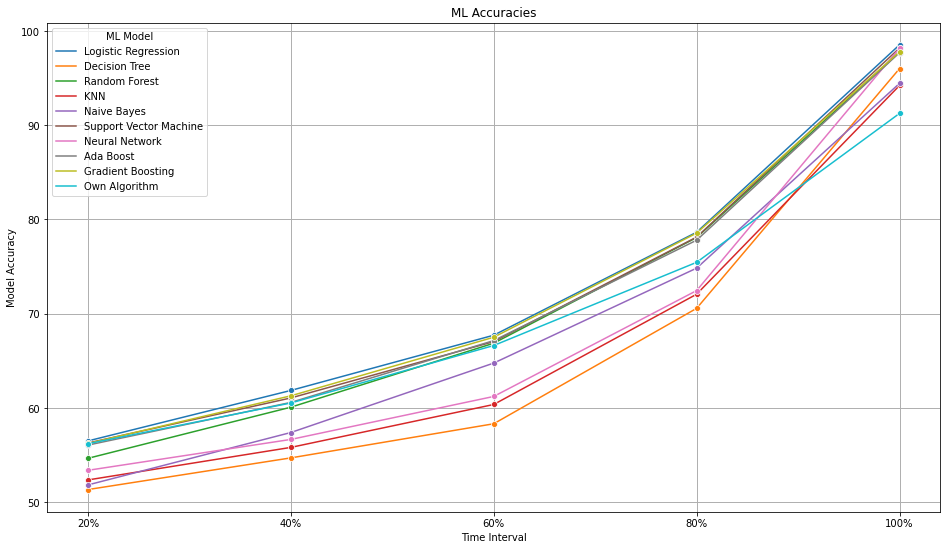

In [78]:
time_intervals = ['20%', '40%', '60%', '80%', '100%']

data = pd.DataFrame({
    'Time Interval': time_intervals,
    'Logistic Regression': logistic_regression_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'KNN': knn_accuracy,
    'Naive Bayes': naive_bayes_accuracy,
    'Support Vector Machine': support_vector_machine_accuracy,
    'Neural Network': neural_network_accuracy,
    'Ada Boost': ada_boost_accuracy,
    'Gradient Boosting': gradient_boosting_accuracy,
    'Own Algorithm': own_algorithm_accuracy
})

data_long = pd.melt(data, id_vars=['Time Interval'],
                    value_vars=[
                        'Logistic Regression',
                        'Decision Tree',
                        'Random Forest',
                        'KNN',
                        'Naive Bayes',
                        'Support Vector Machine',
                        'Neural Network',
                        'Ada Boost',
                        'Gradient Boosting',
                        'Own Algorithm'
                    ],
                    var_name='ML Model',
                    value_name='Score')

plt.figure(figsize=(16,9))
sns.lineplot(x='Time Interval', y='Score', hue='ML Model', data=data_long, marker='o')

plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=1)

plt.xlabel('Time Interval')
plt.ylabel('Model Accuracy')
plt.title('ML Accuracies')

#plt.savefig('12_accuracy_with_own_algorithm.png', dpi=300, bbox_inches='tight')
plt.show()

In [77]:
list_with_times = [
                    logistic_regression_time,
                    decision_tree_time,
                    random_forest_time,
                    knn_time, 
                    naive_bayes_time, 
                    svm_time, 
                    neural_network_time, 
                    ada_boost_time, 
                    gradient_boosting_time,
                    own_algorithm_time
                 ]
print(list_with_times)

[2.0027201175689697, 8.501802206039429, 130.06720876693726, 7.208691120147705, 0.592008113861084, 539.0514693260193, 794.2431433200836, 30.49719262123108, 131.4659104347229, 90.3741192817688]


In [79]:
ML_models_time = {
                    'Logistic Regression': int(list_with_times[0]),
                    'Decision Tree': int(list_with_times[1]),
                    'Random Forest': int(list_with_times[2]),
                    'KNN': int(list_with_times[3]),
                    'Naive Bayes': int(list_with_times[4]),
                    'SVM': int(list_with_times[5]),
                    'Neural Network': int(list_with_times[6]),
                    'Ada Boost': int(list_with_times[7]),
                    'Gradient Boosting': int(list_with_times[8]),
                    'Own Algorithm': int(list_with_times[9])
                }

ML_models = list(ML_models_time.keys())
time_durations = list(ML_models_time.values())

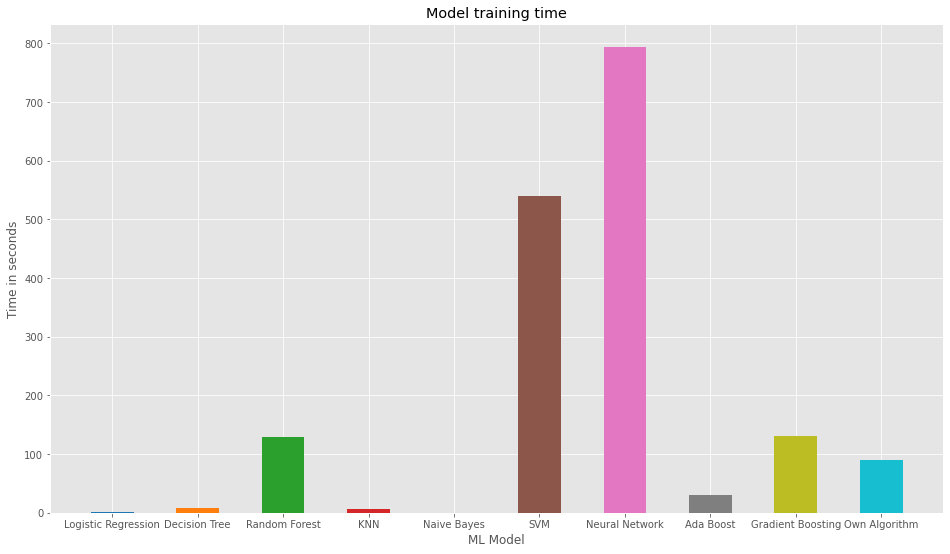

In [81]:
from matplotlib import style

style.use('ggplot')
plt.figure(figsize=(16,9))
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.bar(ML_models, time_durations, color=color, width=0.5)
plt.xlabel('ML Model')
plt.ylabel('Time in seconds')
plt.title('Model training time')

#plt.savefig('12_model_training-time.png', dpi=300, bbox_inches='tight')